
Recopilamos datos históricos sobre caudales de ríos, precipitaciones, temperaturas, humedad y otros factores climáticos de diversas fuentes, incluyendo estaciones meteorológicas locales y bases de datos regionales. Se realizó un análisis exhaustivo de los datos para identificar patrones, tendencias estacionales y posibles problemas de calidad, como valores atípicos y datos faltantes. Además, se analizaron correlaciones entre las variables para comprender qué factores tenían mayor influencia en la disponibilidad de recursos hídricos

* CÓDIGO ESTACIÓN: Representa el Identificador único asignado a cada estación de monitoreo, que permite diferenciarlas dentro del sistema.

* NOMBRE ESTACIÓN: Muestra la denominación dada a la estación hidrológica, que facilita su identificación geográfica.

* FECHA: Muestra el día el mes y el año en el que se tomó la medición.

* NIVEL: Representa la altura del agua en el cauce o reservorio asociado a la estación, utilizada para evaluar la cantidad de agua disponible.

* PRECIPITACIÓN:Indica la cantidad de lluvia acumulada en un periodo de tiempo, medida en milímetros, crucial para entender los aportes hídricos.

* TEMPERATURA: Representa la medición de la temperatura ambiental en grados Celsius, que influye en procesos de evaporación y humedad del suelo.

* HUMEDAD: Indica el porcentaje de vapor de agua en el aire, clave para evaluar la capacidad de retención de agua en la atmósfera y su impacto en las precipitaciones.

* VELOCIDAD: Muestra la velocidad del viento en metros por segundo, que afecta la evaporación y dispersión de la humedad en el área de estudio.



# Autenticador Drive

In [ ]:
# vincular colab con Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Librerias

In [ ]:
# @title Instalar libreria
!pip install sweetviz
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
# importar librerias y modulos a utilizar
import os
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import sweetviz as sw
import category_encoders as ce
from google.colab import files

#ML

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
import xgboost as xgb


#Balanceo
from imblearn.under_sampling import CondensedNearestNeighbour, EditedNearestNeighbours, InstanceHardnessThreshold, RepeatedEditedNearestNeighbours, OneSidedSelection
from imblearn.under_sampling import TomekLinks
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

#Algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Funciones

In [ ]:
# @title Cargamos las funciones relacionadas
# Función para analizar la base de datos que devuelve cantidad de registros, valores únicos, total de vacíos, porcentaje de valores faltantes
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(df)
  print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info)

# Ruta de datos

In [ ]:
# ruta de la carpeta donde están guardadas las bases de datos
path="/content/drive/MyDrive/Talentotech/Proyecto predicción cuencas hídricas/1. PROYECTO FINAL INTELIGENCIA ARTIFICIAL/1. BASES DE DATOS SELECCIONADAS/"

# Base de datos

In [ ]:
# cargamos cada una de las bases de datos
precipitacion = pd.read_csv(path+"Precipitacion Total diaria Manizales.csv", encoding='latin1', delimiter=",")
temp = pd.read_csv(path+"Temperatura Maxima Diaria Manizales.csv", encoding='latin1', delimiter=",")
hum = pd.read_csv(path+"Humedad Relativa Maxima diaria Manizales.csv", encoding='latin1', delimiter=",")
vel = pd.read_csv(path+"Velocidad del Viento Media diaria Manizales.csv", encoding='latin1', delimiter=",")
nivel = pd.read_csv(path+"Nivel Medio Diario Manizales.csv", encoding='latin1', delimiter=",")

# Limpieza de datos

In [ ]:
nivel.head(3)

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,26157100,SAN GABRIEL [26157100],5.119306,-75.564722,1173,LimnimÃ©trica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Caldas,Manizales,...,NaN,NIVEL,NV_MEDIA_D,Nivel medio diario,Diaria,2016-02-01 00:00,115.0000,50,NaN,1200
1,26157100,SAN GABRIEL [26157100],5.119306,-75.564722,1173,LimnimÃ©trica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Caldas,Manizales,...,NaN,NIVEL,NV_MEDIA_D,Nivel medio diario,Diaria,2016-02-02 00:00,114.6875,50,NaN,1200
2,26157100,SAN GABRIEL [26157100],5.119306,-75.564722,1173,LimnimÃ©trica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Caldas,Manizales,...,NaN,NIVEL,NV_MEDIA_D,Nivel medio diario,Diaria,2016-02-03 00:00,110.3125,50,NaN,1200


In [ ]:
# limpiamos los datos, renombrando la columna Valor de cada base de datos por el valor correspondiente
nivel = nivel.rename(columns={'Valor': 'Nivel'})
precipitacion = precipitacion.rename(columns={'Valor': 'Precipitacion'})
temp = temp.rename(columns={'Valor': 'Temperatura'})
hum = hum.rename(columns={'Valor': 'Humedad'})
vel = vel.rename(columns={'Valor': 'Velocidad'})

In [ ]:
nivel.head(3)

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Nivel,Grado,Calificador,NivelAprobacion
0,26157100,SAN GABRIEL [26157100],5.119306,-75.564722,1173,LimnimÃ©trica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Caldas,Manizales,...,NaN,NIVEL,NV_MEDIA_D,Nivel medio diario,Diaria,2016-02-01 00:00,115.0000,50,NaN,1200
1,26157100,SAN GABRIEL [26157100],5.119306,-75.564722,1173,LimnimÃ©trica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Caldas,Manizales,...,NaN,NIVEL,NV_MEDIA_D,Nivel medio diario,Diaria,2016-02-02 00:00,114.6875,50,NaN,1200
2,26157100,SAN GABRIEL [26157100],5.119306,-75.564722,1173,LimnimÃ©trica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Caldas,Manizales,...,NaN,NIVEL,NV_MEDIA_D,Nivel medio diario,Diaria,2016-02-03 00:00,110.3125,50,NaN,1200


In [ ]:
# muestra los datos únicos dentro de una variable
nivel.Latitud.unique()

array([5.11930556])

In [ ]:
# después de analizar cuales columnas no nos interesan, las eliminamos
nivel.drop(columns=['Latitud', 'Longitud', 'Altitud','Categoria', 'Entidad', 'AreaOperativa', 'Departamento', 'Municipio',
                    'FechaInstalacion', 'FechaSuspension', 'IdParametro', 'Etiqueta','DescripcionSerie', 'Frecuencia',
                    'Grado','Calificador', 'NivelAprobacion'], inplace=True)

In [ ]:
nivel.head(3)

,CodigoEstacion,NombreEstacion,Fecha,Nivel
0,26157100,SAN GABRIEL [26157100],2016-02-01 00:00,115.0000
1,26157100,SAN GABRIEL [26157100],2016-02-02 00:00,114.6875
2,26157100,SAN GABRIEL [26157100],2016-02-03 00:00,110.3125


In [ ]:
# estandarizamos los formatos de fecha en todas las bases de datos
nivel['Fecha'] = pd.to_datetime(nivel['Fecha'], format='%Y-%m-%d %H:%M')
precipitacion['Fecha'] = pd.to_datetime(precipitacion['Fecha'], format='%m/%d/%Y')
temp['Fecha'] = pd.to_datetime(temp['Fecha'], format='%m/%d/%Y')
hum['Fecha'] = pd.to_datetime(hum['Fecha'], format='%m/%d/%Y')
vel['Fecha'] = pd.to_datetime(vel['Fecha'], format='%m/%d/%Y')

In [ ]:
nivel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CodigoEstacion  2183 non-null   int64         
 1   NombreEstacion  2183 non-null   object        
 2   Fecha           2183 non-null   datetime64[ns]
 3   Nivel           2183 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 68.3+ KB


In [ ]:
# llevamos las variables que nos interesan a la base de datos principal usando como llave la variable Fecha
# copiamos la variable Precipitación de la base de datos precipitación a la base de datos nivel
df1 = pd.merge(nivel, precipitacion[['Fecha', 'Precipitacion']], how='left', on=['Fecha'])
# copiamos la variable Temperatura de la base de datos temp a la base de datos nivel
df2 = pd.merge(df1, temp[['Fecha', 'Temperatura']], how='left', on=['Fecha'])
# copiamos la variable Humedad de la base de datos hum a la base de datos nivel
df3 = pd.merge(df2, hum[['Fecha', 'Humedad']], how='left', on=['Fecha'])
# copiamos la variable Velocidad de la base de datos vel a la base de datos nivel
df4 = pd.merge(df3, vel[['Fecha', 'Velocidad']], how='left', on=['Fecha'])

In [ ]:
df4.head(3)

,CodigoEstacion,NombreEstacion,Fecha,Nivel,Precipitacion,Temperatura,Humedad,Velocidad
0,26157100,SAN GABRIEL [26157100],2016-02-01,115.0000,NaN,NaN,NaN,1.654514
1,26157100,SAN GABRIEL [26157100],2016-02-02,114.6875,NaN,NaN,NaN,1.523958
2,26157100,SAN GABRIEL [26157100],2016-02-03,110.3125,NaN,NaN,NaN,1.628472


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CodigoEstacion  2183 non-null   int64         
 1   NombreEstacion  2183 non-null   object        
 2   Fecha           2183 non-null   datetime64[ns]
 3   Nivel           2183 non-null   float64       
 4   Precipitacion   1126 non-null   float64       
 5   Temperatura     1780 non-null   float64       
 6   Humedad         1752 non-null   float64       
 7   Velocidad       1218 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 136.6+ KB


In [ ]:
df4['day'] = pd.DatetimeIndex(df4['Fecha']).day
df4['month'] = pd.DatetimeIndex(df4['Fecha']).month
df4.head(32)

,CodigoEstacion,NombreEstacion,Fecha,Nivel,Precipitacion,Temperatura,Humedad,Velocidad,day,month
0,26157100,SAN GABRIEL [26157100],2016-02-01,115.000000,NaN,NaN,NaN,1.654514,1,2
1,26157100,SAN GABRIEL [26157100],2016-02-02,114.687500,NaN,NaN,NaN,1.523958,2,2
2,26157100,SAN GABRIEL [26157100],2016-02-03,110.312500,NaN,NaN,NaN,1.628472,3,2
3,26157100,SAN GABRIEL [26157100],2016-02-04,116.875000,NaN,NaN,NaN,1.735069,4,2
4,26157100,SAN GABRIEL [26157100],2016-02-05,116.875000,NaN,NaN,NaN,1.476736,5,2
5,26157100,SAN GABRIEL [26157100],2016-02-06,114.687500,NaN,NaN,NaN,1.813889,6,2
6,26157100,SAN GABRIEL [26157100],2016-02-07,110.312500,NaN,NaN,NaN,1.848958,7,2
7,26157100,SAN GABRIEL [26157100],2016-02-08,110.000000,NaN,NaN,NaN,1.622222,8,2
8,26157100,SAN GABRIEL [26157100],2016-02-09,110.000000,NaN,NaN,NaN,1.581250,9,2
9,26157100,SAN GABRIEL [26157100],2016-02-10,110.000000,NaN,NaN,NaN,1.425694,10,2


In [ ]:
# @title Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {df4.shape}")

Forma de los datos (filas, columnas): (2183, 10)


In [ ]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df4.dtypes)


Tipos de datos por columna:
CodigoEstacion             int64
NombreEstacion            object
Fecha             datetime64[ns]
Nivel                    float64
Precipitacion            float64
Temperatura              float64
Humedad                  float64
Velocidad                float64
day                        int32
month                      int32
dtype: object


In [ ]:
#@title Contar los valores únicos por columna
print("\nValores únicos por columna:")
print(df4.nunique())


Valores únicos por columna:
CodigoEstacion       1
NombreEstacion       1
Fecha             2183
Nivel              716
Precipitacion      207
Temperatura         55
Humedad             36
Velocidad          990
day                 31
month               12
dtype: int64


In [ ]:
#@title Verificar si hay datos faltantes
print("\nDatos faltantes por columna:")
print(df4.isnull().sum())


Datos faltantes por columna:
CodigoEstacion       0
NombreEstacion       0
Fecha                0
Nivel                0
Precipitacion     1057
Temperatura        403
Humedad            431
Velocidad          965
day                  0
month                0
dtype: int64


In [ ]:
# @title Verificación de los campos con relación a la composición de la base de dato almacenada en formato CSV
df_analizado = analizar_columnas(df4)
df_analizado

,Columna,Cantidad de registros,Únicos,Cantidad de nulos,Porcentaje de nulos,Registros relacionados con nulos
0,CodigoEstacion,2183,1,0,0.000000,2183
1,NombreEstacion,2183,1,0,0.000000,2183
2,Fecha,2183,2183,0,0.000000,2183
3,Nivel,2183,716,0,0.000000,2183
4,Precipitacion,2183,207,1057,48.419606,1126
5,Temperatura,2183,55,403,18.460834,1780
6,Humedad,2183,36,431,19.743472,1752
7,Velocidad,2183,990,965,44.205222,1218
8,day,2183,31,0,0.000000,2183
9,month,2183,12,0,0.000000,2183


In [ ]:
# @title Realizamos la descriptiva estadística
df4.describe()

,CodigoEstacion,Fecha,Nivel,Precipitacion,Temperatura,Humedad,Velocidad,day,month
count,2183.0,2183,2183.000000,1126.000000,1780.000000,1752.000000,1218.000000,2183.000000,2183.000000
mean,26157100.0,2019-03-02 20:19:40.760421632,132.554426,4.354440,21.387978,85.556507,1.479230,15.685754,6.436097
min,26157100.0,2016-02-01 00:00:00,110.000000,0.000000,16.000000,50.000000,0.878125,1.000000,1.000000
25%,26157100.0,2017-09-01 12:00:00,124.843750,0.000000,20.400000,81.000000,1.296441,8.000000,3.000000
50%,26157100.0,2019-03-01 00:00:00,130.312500,0.300000,21.400000,86.000000,1.442361,16.000000,6.000000
75%,26157100.0,2020-08-27 12:00:00,137.500000,4.400000,22.400000,90.000000,1.632986,23.000000,10.000000
max,26157100.0,2022-03-30 00:00:00,206.250000,91.800000,26.600000,100.000000,3.165625,31.000000,12.000000
std,0.0,NaN,12.743163,9.445984,1.572409,6.662990,0.257956,8.784841,3.493928


In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'Cuencas'
advert_report = sw.analyze([df4, nombre]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: no


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CodigoEstacion  2183 non-null   int64         
 1   NombreEstacion  2183 non-null   object        
 2   Fecha           2183 non-null   datetime64[ns]
 3   Nivel           2183 non-null   float64       
 4   Precipitacion   1126 non-null   float64       
 5   Temperatura     1780 non-null   float64       
 6   Humedad         1752 non-null   float64       
 7   Velocidad       1218 non-null   float64       
 8   day             2183 non-null   int32         
 9   month           2183 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(1), object(1)
memory usage: 153.6+ KB


In [ ]:
# borramos los registros con datos faltantes de precipitación, temperatura y humedad
df4.dropna(subset=['Precipitacion', 'Temperatura', 'Humedad'], inplace=True) #, 'Velocidad'

In [ ]:
# codificamos las variables day y month

#Target encoding
#encoder = ce.TargetEncoder(cols=['day', 'month'])
#df4[['day', 'month']] = encoder.fit_transform(df4[['day', 'month']], df4['Nivel'])

#Leave one out encoding
encoder = ce.LeaveOneOutEncoder(cols=['day', 'month'])
df4[['day', 'month']] = encoder.fit_transform(df4[['day', 'month']], df4['Nivel'])

In [ ]:
df4.head(3)

,CodigoEstacion,NombreEstacion,Fecha,Nivel,Precipitacion,Temperatura,Humedad,Velocidad,day,month
303,26157100,SAN GABRIEL [26157100],2017-01-01,135.0,0.0,21.2,80.0,1.279514,134.111983,130.201351
304,26157100,SAN GABRIEL [26157100],2017-01-02,135.0,0.0,22.0,82.0,1.465625,132.612676,130.201351
305,26157100,SAN GABRIEL [26157100],2017-01-03,135.0,0.0,22.0,78.0,1.293750,131.942195,130.201351


In [ ]:
# separamos caracteristicas y etiquetas
X, y = df4[['Precipitacion', 'Temperatura', 'Humedad', 'day', 'month']].values, df4['Nivel'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[  0.          21.2         80.         134.1119825  130.20135135]
 [  0.          22.          82.         132.61267606 130.20135135]
 [  0.          22.          78.         131.94219484 130.20135135]
 [  5.6         22.          84.         133.93926056 130.20135135]
 [  0.          19.          87.         132.64034205 130.20135135]
 [  4.4         22.          83.         134.08887796 130.13108108]
 [  8.1         22.          86.         132.51553831 130.15      ]
 [ 27.3         18.6         90.         132.04602806 130.16081081]
 [  4.8         18.4         96.         131.19043427 130.00135135]
 [  0.4         18.6         90.         132.50261417 130.20135135]]

Labels:
[135.  135.  135.  135.  135.  148.  144.5 142.5 172.  135. ]


In [ ]:
#@title Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = df4[['Precipitacion', 'Temperatura', 'Humedad', 'day', 'month']].select_dtypes(include=['number'])

# Calcular la matriz de correlación
conf_matrix = numeric_cols.corr()

# Mostrar la matriz de correlación
conf_matrix

,Precipitacion,Temperatura,Humedad,day,month
Precipitacion,1.000000,-0.316472,0.327799,-0.018236,0.149834
Temperatura,-0.316472,1.000000,-0.512447,0.093766,-0.236089
Humedad,0.327799,-0.512447,1.000000,-0.035280,0.230332
day,-0.018236,0.093766,-0.035280,1.000000,-0.125812
month,0.149834,-0.236089,0.230332,-0.125812,1.000000


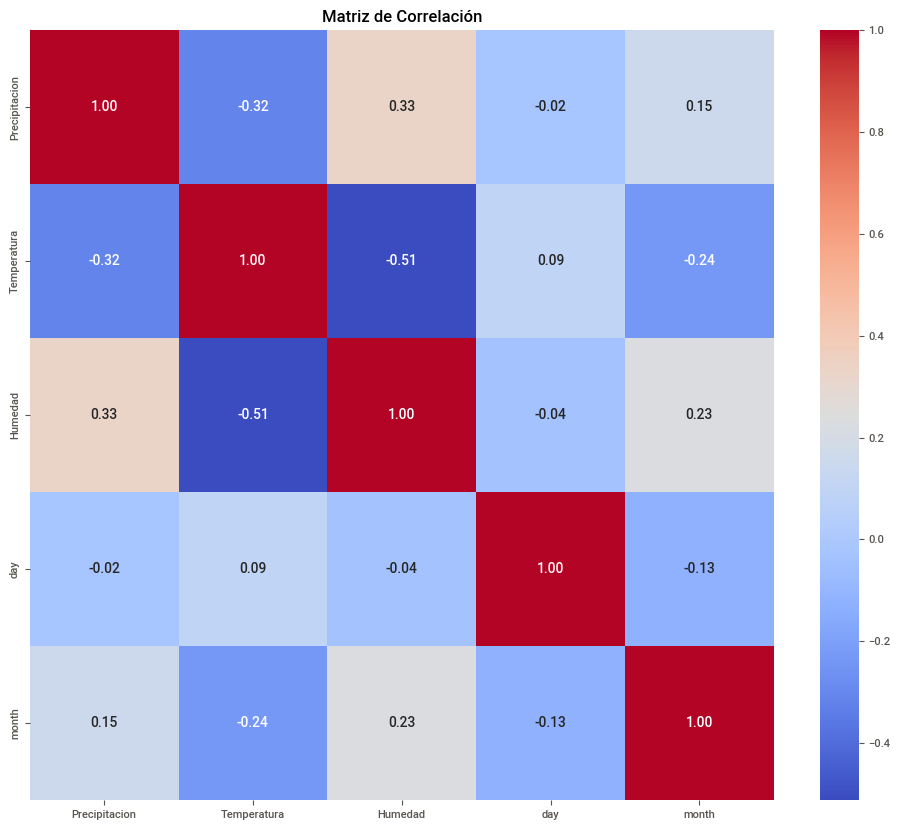

In [ ]:
# @title Visualización de la correlación entre variables numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

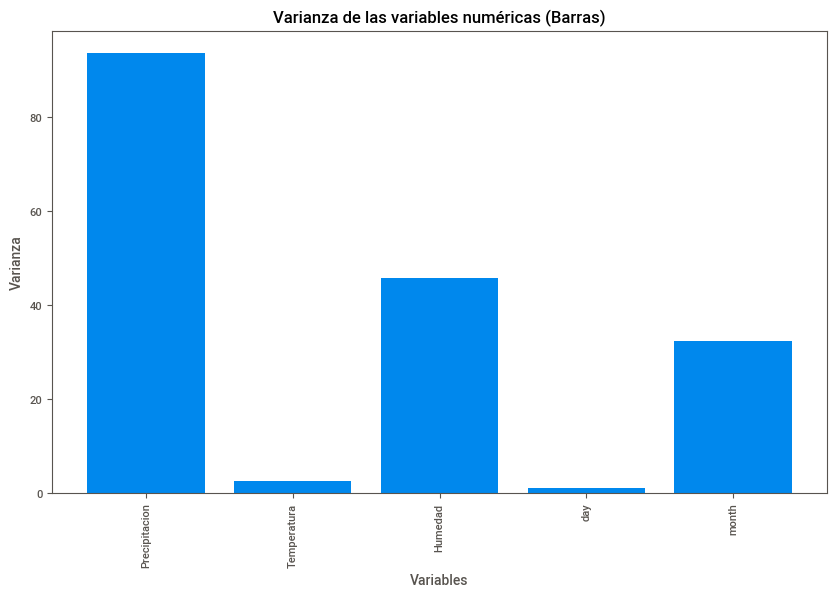

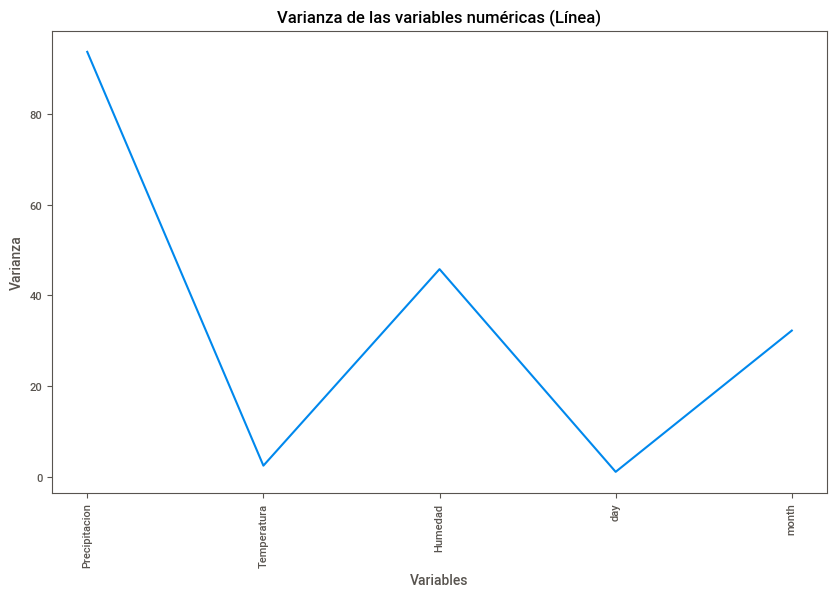

In [ ]:
#@title visualizar la varianza de las variables numericas con numeric_cols.var() en barras y en linea juntas

# Calcular la varianza de las columnas numéricas
variance = numeric_cols.var()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(variance.index, variance.values)
plt.title('Varianza de las variables numéricas (Barras)')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=90)
plt.show()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(variance.index, variance.values)
plt.title('Varianza de las variables numéricas (Línea)')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Dividimos los datos 70%-30% en datos de entrenamiento y datos de pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Datos de entrenamiento: %d rows\nDatos de prueba: %d rows' % (X_train.shape[0], X_test.shape[0]))

Datos de entrenamiento: 690 rows
Datos de prueba: 297 rows


In [ ]:
# Entrenamiento del modelo

# Entrenamos el modelo de regresión lineal con los datos de entrenamiento
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


## Evaluación del modelo entrenado

In [ ]:
# Generamos las predicciones con los datos de prueba
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Etiquetas predichas: ', np.round(predictions)[:10])
print('Etiquetas actuales : ',y_test[:10])

Etiquetas predichas:  [133. 145. 130. 141. 141. 126. 131. 137. 143. 144.]
Etiquetas actuales :  [135.         154.0625     135.         135.         148.54166667
 130.9375     128.4375     142.29166667 151.04166667 141.5625    ]


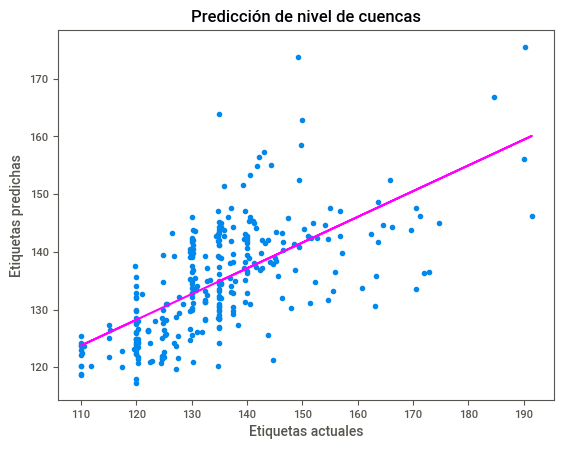

In [ ]:
# Muestra las gráficas generadas en la misma celda
%matplotlib inline

# Graficamos las predicciones vs los datos reales
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas actuales')
plt.ylabel('Etiquetas predichas')
plt.title('Predicción de nivel de cuencas')
# Sobreponemos la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
# calculamos las métricas para este modelo
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 117.44173446310391
RMSE: 10.8370537722715
R2: 0.4345917879433463


# Regresion polinomica

In [ ]:
# Entrenamiento del modelo de regresión polinómica

#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2) #7

#Se transforman las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

#Definimos el algoritmo a utilizar
pr = LinearRegression()

#Entrenamos el modelo
pr.fit(X_train_poli, y_train)

#Realizamos una predicción
Y_pred_pr = pr.predict(X_test_poli)

print('Valor de la pendiente o coeficiente "a":')
print(pr.coef_)

print('Valor de la intersección o coeficiente "b":')
print(pr.intercept_)

print('Precisión del modelo:')
print(pr.score(X_train_poli, y_train))

Valor de la pendiente o coeficiente "a":
[  0.         -17.21978469  61.17179155  -0.54934409 -78.9645685
  -1.13698941  -0.00462964   0.14921751   0.01679014   0.09474924
   0.00543466  -0.04415869  -0.06544586  -0.3987479   -0.01864827
  -0.00947417  -0.00291826   0.03006209   0.3280346   -0.00036838
   0.00030548]
Valor de la intersección o coeficiente "b":
4810.265599359666
Precisión del modelo:
0.5040992064535408


In [ ]:
# Calcular el R^2 en el conjunto de prueba
r2_test = r2_score(y_test, Y_pred_pr)
print('R^2 en el conjunto de prueba:', r2_test)

R^2 en el conjunto de prueba: 0.4495753973550475


RandomForestRegressor() 

MSE: 62.62429170267035
RMSE: 7.913551143618796
R2: 0.6985033560276205


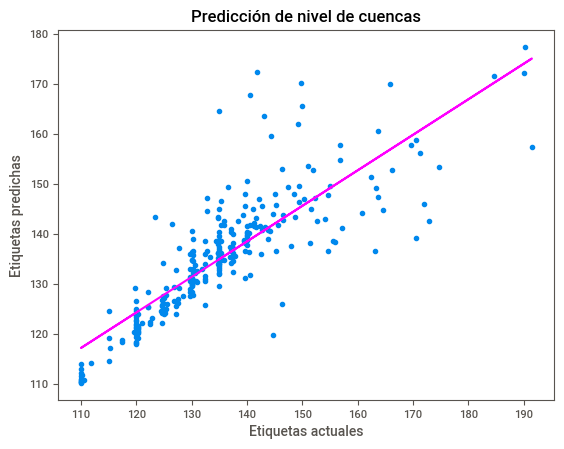

In [ ]:
# Entrenamiento del módelo de Random Forest Regressor usando los datos de entrenamiento
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluamos el modelo usando los datos de prueba
predictions = model.predict(X_test)

# Calculamos las métricas
# Error Cuadrático Medio (MSE):
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
# Raíz del Error Cuadrático Medio (RMSE):
rmse = np.sqrt(mse)
print("RMSE:", rmse)
# Coeficiente de Determinación (R²):
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Graficamos etiquetas predichas vs actuales
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas actuales')
plt.ylabel('Etiquetas predichas')
plt.title('Predicción de nivel de cuencas')

# sobreponemos la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
# Entrenamos el modelo Decision Tree Regressor con los datos de entrenamiento
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualizamos el árbol del modelo
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_4 <= 134.81
|   |--- feature_4 <= 128.29
|   |   |--- feature_4 <= 124.03
|   |   |   |--- feature_4 <= 124.03
|   |   |   |   |--- feature_4 <= 123.96
|   |   |   |   |   |--- feature_4 <= 123.93
|   |   |   |   |   |   |--- value: [145.94]
|   |   |   |   |   |--- feature_4 >  123.93
|   |   |   |   |   |   |--- feature_2 <= 89.00
|   |   |   |   |   |   |   |--- value: [142.19]
|   |   |   |   |   |   |--- feature_2 >  89.00
|   |   |   |   |   |   |   |--- value: [139.81]
|   |   |   |   |--- feature_4 >  123.96
|   |   |   |   |   |--- feature_4 <= 124.00
|   |   |   |   |   |   |--- feature_2 <= 80.50
|   |   |   |   |   |   |   |--- feature_3 <= 133.25
|   |   |   |   |   |   |   |   |--- value: [132.50]
|   |   |   |   |   |   |   |--- feature_3 >  133.25
|   |   |   |   |   |   |   |   |--- value: [132.72]
|   |   |   |   |   |   |--- feature_2 >  80.50
|   |   |   |   |   |   |   |--- feature_0 <= 5.05
|   |   |   |   |   |   |   |   |--

MSE: 62.62429170267035
RMSE: 7.913551143618796
R2: 0.6985033560276205


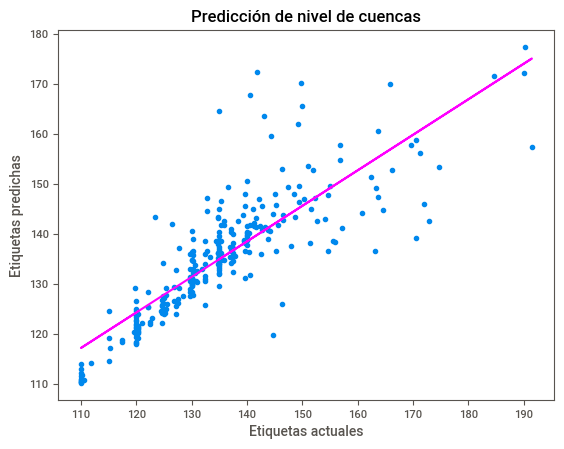

In [ ]:
# Evaluamos el modelo usando los datos de prueba
predictions = model.predict(X_test)

# Calculamos las métricas
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Graficamos etiquetas predichas vs actuales
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas actuales')
plt.ylabel('Etiquetas predichas')
plt.title('Predicción de nivel de cuencas')

# sobreponemos la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 66.46709578612356
RMSE: 8.152735478728815
R2: 0.6800026671878121


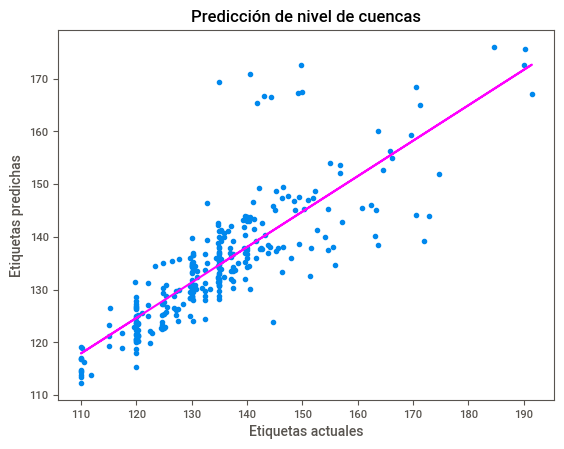

In [ ]:
# Entrenamiento del modelo Gradient Boosting Regressor

# Entrenamos el modelo usando los datos de entrenamiento
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluamos el modelo usando los datos de prueba
predictions = model.predict(X_test)
# Calculamos las métricas
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Graficamos etiquetas predichas vs actuales
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas actuales')
plt.ylabel('Etiquetas predichas')
plt.title('Predicción de nivel de cuencas')
# sobreponemos la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()